## 로지스틱 회귀

### 시그모이드 함수
- 데이터를 0~1사이 배치시키는 확률을 위한 함수

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

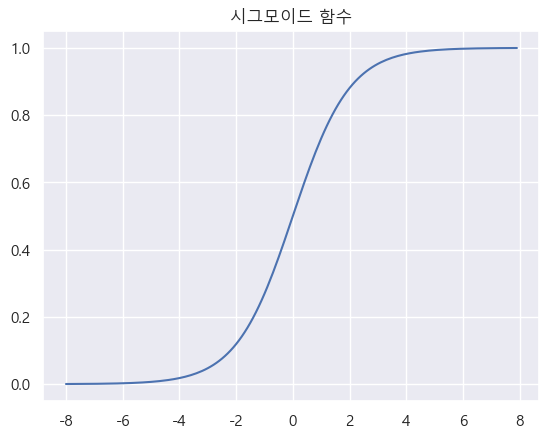

In [6]:
# 시그모이드 함수 그리기
z = np.arange(-8, 8, 0.1)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title('시그모이드 함수')
plt.show()

- `클래스` - 분류되는 아이템
    - 양성 클래스 - 0.5보다 크면
    - 음성 클래스 - 0.5보다 작으면

### 로지스틱 회귀 이진 분류

#### 데이터 준비

- 기준데이터 : https://bit.ly/fish_csv_data 
- Pandas로 데이터 로드
- Numpy는 문자열은 처리안됨

In [7]:
import pandas as pd

In [8]:
# 데이터 로드
fish = pd.read_csv('./fish.csv', encoding='utf-8')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


- Species(종), Weight(무게), Length(길이), Diagonal(대각선길이), Height(높이), Width(두께)
- 어종 분류
    - Bream - 도미
    - Roach - 유럽잉어
    - Whitefish - 송어
    - Parkki - 팍키(?)
    - Perch - 농어
    - Pike - 강꼬치고기
    - Smelt - 빙어

In [9]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

- 특성데이터, 타겟데이터 분리

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [12]:
fish_input[:4]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555]])

In [13]:
# 물고기종 타겟
fish_target = fish['Species'].to_numpy()

In [16]:
fish_target[:4]

array(['Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [17]:
# 훈련세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split

In [18]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [21]:
train_input.shape

(119, 5)

In [22]:
test_input.shape

(40, 5)

In [24]:
train_target.shape

(119,)

In [25]:
test_target.shape

(40,)

- 특성이 전부 단위달라서 무게가 가장 영향이 크게됨
- 모든 특성데이터를 -2~ 2사이로 재배치
- 직접 평균으로 빼고, 표준편차로 나눌것이 아니면 StandardScaler를 사용할 것

In [31]:
# 표준정규화(Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(train_input)

StandardScaler()

In [33]:
# fit_tranform() == fit(), tranform()
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [36]:
train_scaled[3]

array([-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471])

- Bream(도미)와 Smelt(빙어)만 분리

In [26]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

- bream_smelt_indexes 에서 True 인것만 추출

In [40]:
train_scaled_bream_smelt = train_scaled[bream_smelt_indexes]

In [41]:
train_target_bream_smelt = train_target[bream_smelt_indexes]

In [44]:
train_scaled_bream_smelt.shape

(33, 5)

#### 이진분류 수행

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()
lr

LogisticRegression()

In [47]:
lr.fit(train_scaled_bream_smelt, train_target_bream_smelt)

LogisticRegression()

In [48]:
lr.score(train_scaled_bream_smelt, train_target_bream_smelt)

1.0

In [63]:
lr.predict(train_scaled_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [64]:
# 원본 데이터에서 확인
train_input[bream_smelt_indexes][:5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [620.    ,  34.5   ,  39.7   ,  15.5227,   5.2801],
       [500.    ,  31.    ,  36.2   ,  14.3714,   4.8146],
       [714.    ,  36.    ,  41.5   ,  16.517 ,   5.8515]])

In [65]:
train_target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

- predict_proba() - 샘플당 두개의 확률 출력
    - 첫번째 열 - 음성클래스(도미)
    - 두번째 열 - 양성클래스(빙어)

In [67]:
lr.predict_proba(train_scaled_bream_smelt[:5])

array([[0.99760007, 0.00239993],
       [0.02737325, 0.97262675],
       [0.99486386, 0.00513614],
       [0.98585047, 0.01414953],
       [0.99767419, 0.00232581]])

In [57]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [58]:
# 계수(기울기/가중치), 절편 구하기
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


- 이진분류 로지스틱 회귀 방정식
    - z = -0.40451732 x 무게 - 0.57582787 x 길이 - 0.66248158 x 대각선길이 - 1.01329614 x 높이 - 0.73123131 x 두께 - 2.16172774

In [59]:
# z값 -> lr.decision_function() 사용
decisions = lr.decision_function(train_scaled_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

- 시그모이드 함수에 통과시켜 확률 구함
- Scipy - Numpy와 유사한 과학 라이브러리
    - expit() - np.exp(-z)보다 계산이 편리

In [61]:
from scipy.special import expit

In [62]:
expit(decisions)

array([0.00239993, 0.97262675, 0.00513614, 0.01414953, 0.00232581])

- 0.5 초과의 양성클래스 - smelt(빙어)
- 0.5 이하의 음성클래스 - bream(도미)

#### 결론
- 머신러닝에서 이진분류시 로지스틱 회귀가 가장 효과적

### 로지스틱 회귀 다중 분류

- 데이터가 모두 들어있는 train_scaled, train_target을 사용
- 규제 사용 : 과대적합 또는 과소적합을 막기위해서 추가하는 `하이퍼파라미터`
- 반복횟수 : 사용자가 정하는 `하이퍼파라미터`

In [95]:
# 규제 C=20 기본값 1. 
# 반복횟수 max_iter=1000 번
lr2 = LogisticRegression(C=20, max_iter=1000)
lr2

LogisticRegression(C=20, max_iter=1000)

In [96]:
# 로지스틱 회귀 훈련
lr2.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [97]:
lr2.score(train_scaled, train_target)

0.9327731092436975

In [98]:
lr2.score(test_scaled, test_target)

0.925

In [99]:
# 테스트 데이터로 예측
lr2.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [101]:
# 실제 데이터
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

- 예측확률표 출력

In [104]:
lr2.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

- 예상결과
- ['Perch', 'Smelt', 'Pike', 'Roach', 'Perch']

In [105]:
proba = lr2.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)
# Bream, Parkki, Perch, Pike, Roach, Smelt, Whitefish
# 도미, 팍키, 농어, 강꼬치고기, 유럽잉어, 빙어, 송어

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

- 네번째 데이터는 Roach로 판단하는 확률이 56.7% 밖에 안됨
- 제대로 예측을 못함

#### 소프트맥스 함수 사용

In [109]:
decision = lr2.decision_function(test_scaled[:5])
decision

array([[ -6.50722811,   1.03902667,   5.16819137,  -2.75730347,
          3.336552  ,   0.34625857,  -0.62549703],
       [-10.87900745,   1.94410611,   4.77600606,  -2.42306183,
          2.98748716,   7.84171373,  -4.24724378],
       [ -4.33809955,  -6.23690281,   3.16746647,   6.4809139 ,
          2.36412675,   2.43431897,  -3.87182373],
       [ -0.69143992,   0.44628534,   2.64291146,  -1.21457287,
          3.2612452 ,  -5.70143407,   1.25700485],
       [ -6.40138609,  -1.99137622,   5.81526371,  -0.13464401,
          3.49905133,  -0.08753487,  -0.69937385]])

In [106]:
from scipy.special import softmax

In [110]:
proba2 = softmax(decision, axis=1)
np.round(proba2, decimals=3)
# lr2.predict_proba()로 처리한결과 == scipy.softmax()로 계산한결과

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

#### 결론
- `K-최근접 이웃 분류` - 이진분류. 나의 주위 가까운 값들을 평균내서 계산한 알고리즘
- `로지스틱회귀` - 선형방정식을 이용한 분류 알고리즘. 
    - `시그모이드함수` - 이진 분류
    - `소프트맥스함수` - 다중 분류